# Forest Visualization

## Importing modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Preprocessing

In [3]:
df = pd.read_csv('training.csv')

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Check for null values

In [5]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,4.643454,4.270195,90.474652,93.927577,536.747911,8.799721,18.132591,42.768802,3.949304,0.003900,11.176212
std,2.246265,1.235860,4.769438,43.428465,244.967064,4.617767,5.285880,15.750482,1.795616,0.054786,62.206946
min,1.000000,2.000000,50.400000,2.400000,7.900000,0.400000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.100000,52.200000,427.450000,6.300000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,99.900000,658.200000,8.400000,18.800000,40.000000,3.600000,0.000000,0.000000
75%,6.500000,5.000000,92.500000,129.500000,702.550000,10.400000,21.650000,51.000000,5.400000,0.000000,5.410000
max,9.000000,9.000000,96.000000,183.100000,822.800000,56.100000,30.200000,99.000000,9.400000,1.000000,1090.840000


### Converting categorical strings to numbers

In [7]:
cat_columns = ['month', 'day']
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
def remove_outliers(df, selected_cols):
    df2 = df.copy()
    min_quartile = df2.quantile(0.25)
    max_quartile = df2.quantile(0.75)
    iqr = max_quartile - min_quartile
    max_values = max_quartile + 1.5 * iqr
    min_values = min_quartile - 1.5 * iqr
    df2[selected_cols] = df2[selected_cols][df2[selected_cols] <= max_values]
    df2[selected_cols] = df2[selected_cols][df2[selected_cols] >= min_values]
    df2 = df2.dropna()
    return df2

In [9]:
df2 = remove_outliers(df, ['FFMC', 'DMC', 'RH', 'ISI'])

In [10]:
df2.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,4.528814,4.213559,91.542373,101.115254,568.466780,8.857627,19.141695,40.789831,3.750169,0.003390,12.271492
std,2.231123,1.188874,1.684039,39.138350,229.444435,2.803885,4.316681,13.000650,1.689420,0.058222,68.261588
min,1.000000,2.000000,86.600000,6.600000,18.700000,3.200000,5.500000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.600000,81.800000,499.600000,7.000000,16.350000,31.500000,2.200000,0.000000,0.000000
50%,4.000000,4.000000,91.700000,104.200000,669.100000,8.500000,19.300000,39.000000,3.600000,0.000000,0.000000
75%,6.000000,5.000000,92.500000,129.800000,709.900000,10.050000,21.900000,47.000000,4.900000,0.000000,5.030000
max,9.000000,9.000000,96.000000,180.400000,822.800000,16.500000,30.200000,79.000000,9.400000,1.000000,1090.840000


In [11]:
def normalize(df, col):
    maxVal, minVal = df[col].max(), df[col].min()
    den = maxVal - minVal
    if den == 0:
        return 0
    return (df[col] - minVal) / (maxVal - minVal)

In [12]:
cols = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "area", "rain", "area"]
df3 = df2.copy()
for col in cols:
    df3[col] = normalize(df3, col)
df3.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,4,oct,tue,0.425532,0.165708,0.808855,0.263158,0.506073,0.28125,0.055556,0.0,0.0
2,7,4,oct,sat,0.425532,0.213464,0.830991,0.263158,0.368421,0.28125,0.100000,0.0,0.0
5,8,6,aug,sun,0.606383,0.452819,0.583634,0.864662,0.676113,0.21875,0.555556,0.0,0.0
6,8,6,aug,mon,0.606383,0.473533,0.593085,0.398496,0.753036,0.18750,0.300000,0.0,0.0
8,8,6,sep,tue,0.468085,0.707135,0.838080,0.285714,0.307692,0.75000,0.555556,0.0,0.0


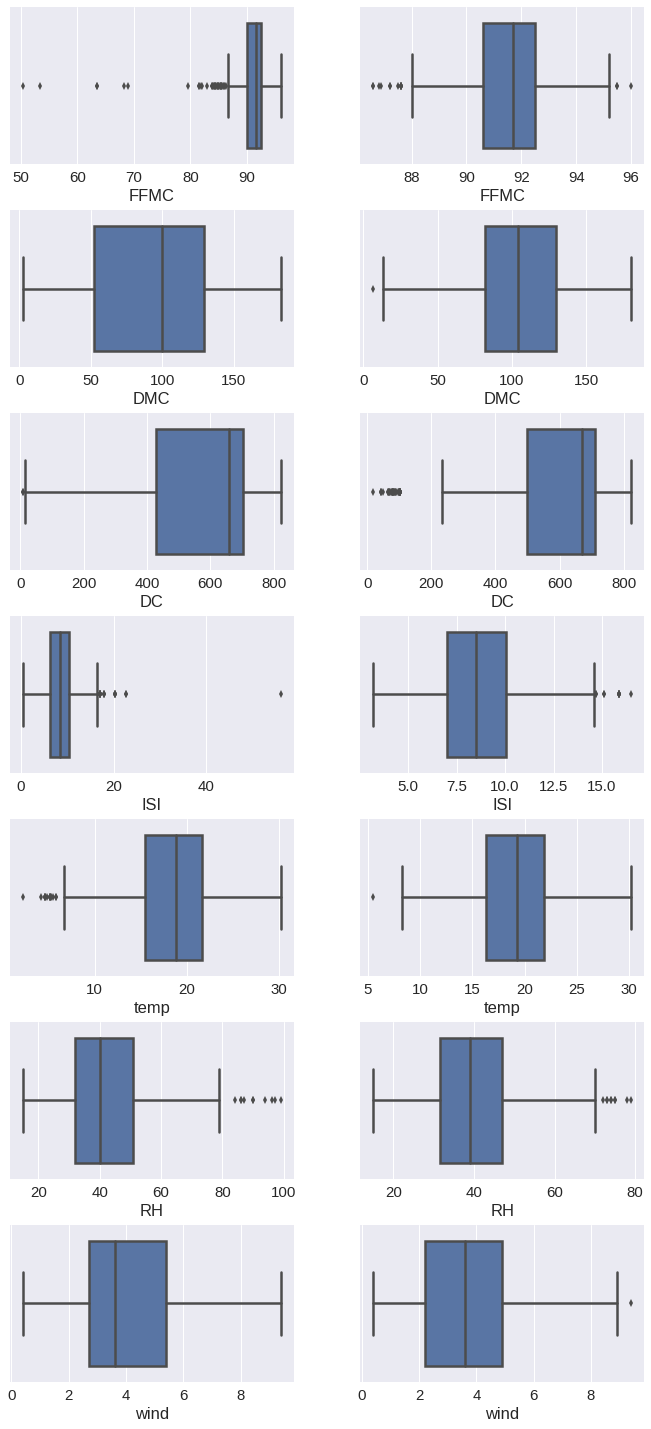

In [13]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
columns = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind"]
fig, ax = plt.subplots( ncols=2, nrows=len(columns), figsize=(10,20))
fig.tight_layout()
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax = ax[i][0])
    sns.boxplot(x=df2[col], ax = ax[i][1])

## Visualization

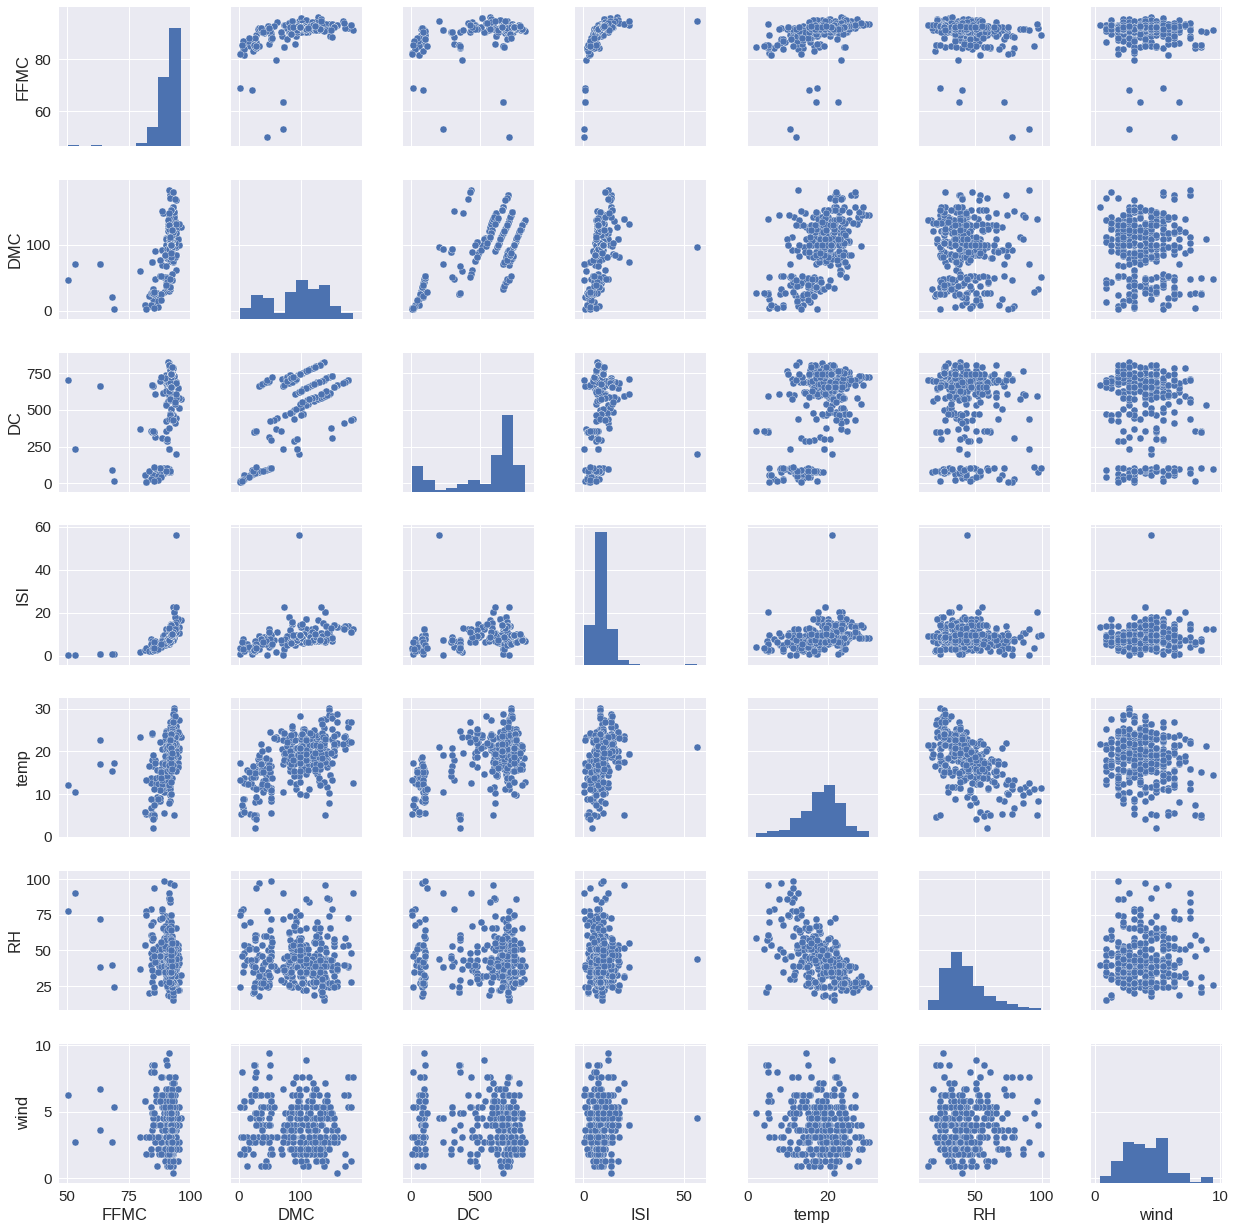

In [14]:
sns.pairplot(df[columns])

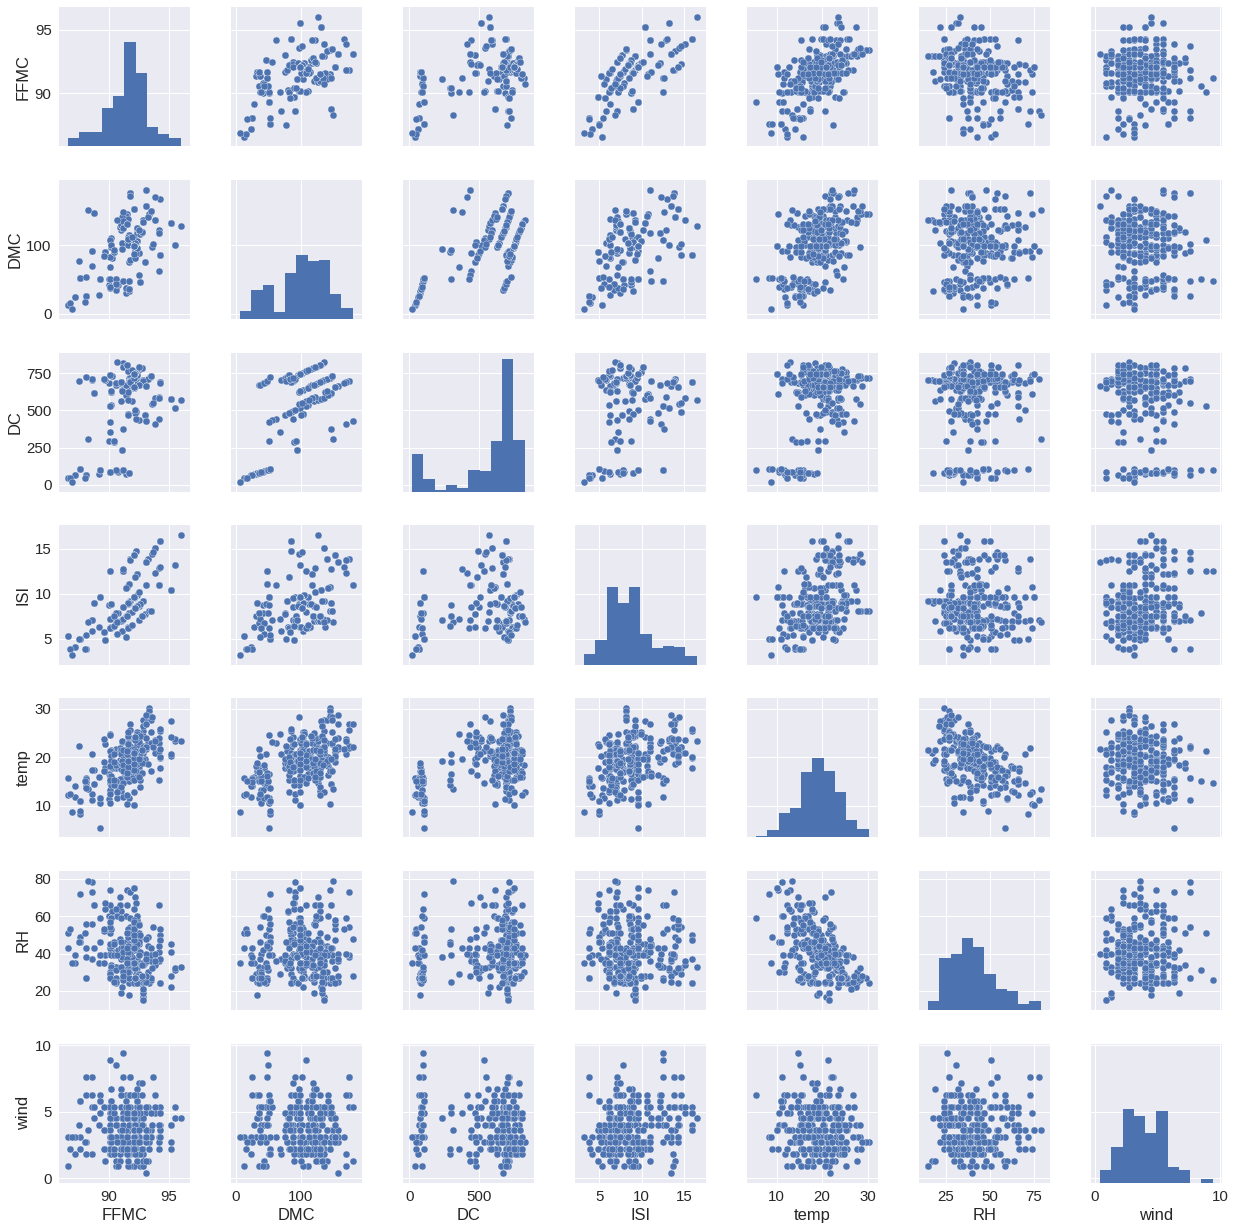

In [15]:
sns.pairplot(df2[columns])

In [16]:
month_group =df.groupby('month')
month_group.size()


month
apr      6
aug     99
dec      9
feb     11
jan      1
jul     17
jun     11
mar     46
may      1
oct     15
sep    143
dtype: int64

In [17]:
area_totals = month_group.sum()
area_totals.sort(columns='area').head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,,
jan,2,4,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
may,6,5,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
jun,66,57,968.3,1105.7,3317.1,129.3,204.5,495,42.1,0.0,5.61
apr,35,26,502.2,89.1,344.2,20.1,66.2,298,23.7,0.0,15.54
feb,55,51,921.2,135.3,732.4,42.7,118.4,554,36.5,0.0,44.77


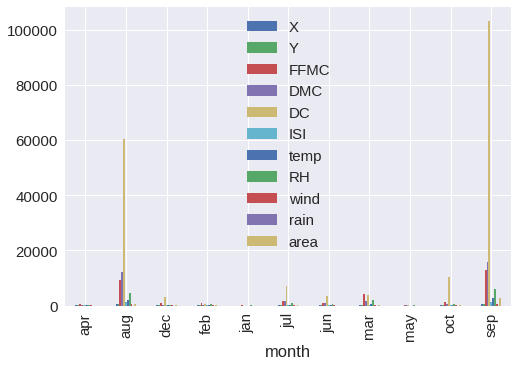

In [18]:
my_plot = area_totals.plot(kind='bar')


In [19]:
days_group =df.groupby('day')
days_group.size()

day
fri    59
mon    58
sat    62
sun    64
thu    37
tue    43
wed    36
dtype: int64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


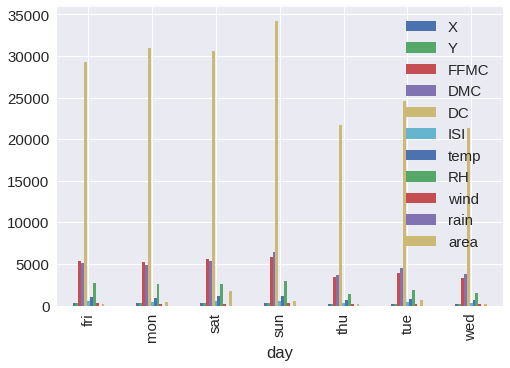

In [20]:
area_totals = days_group.sum()
area_totals.sort(columns='area').head()
my_plot = area_totals.plot(kind='bar')

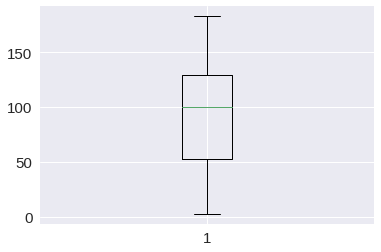

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(df["DMC"].values)
plt.show()

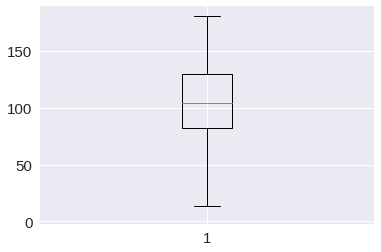

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(df2["DMC"].values)
plt.show()

In [28]:
#analyse per month
category_group=df2.groupby(['month','day']).sum()
category_group.head()

X   Y    FFMC     DMC       DC    ISI   temp     RH  wind  rain  \
month day                                                                     
apr   wed   6   3    88.0    17.2     43.5    3.8   15.2   51.0   2.7   0.0   
aug   fri  31  30   645.0   908.5   4119.5   84.2  142.7  321.0  31.7   0.0   
      mon  26  26   551.1   684.0   3531.6   55.9  126.3  229.0  20.5   0.0   
      sat  57  50  1007.4  1238.3   6542.6  115.0  213.2  497.0  41.1   0.0   
      sun  93  85  1827.0  2587.7  12365.7  209.5  405.5  878.0  97.2   1.0   

             area  
month day          
apr   wed    0.00  
aug   fri   29.94  
      mon    8.85  
      sat  147.71  
      sun  249.83

In [29]:
category_group.unstack().head()

X                                         Y              ...   rain  \
day     fri   mon   sat   sun   thu   tue   wed   fri   mon   sat  ...    thu   
month                                                              ...          
apr     NaN   NaN   NaN   NaN   NaN   NaN   6.0   NaN   NaN   NaN  ...    NaN   
aug    31.0  26.0  57.0  93.0  49.0  42.0  63.0  30.0  26.0  50.0  ...    0.0   
feb    11.0   NaN   NaN   5.0   NaN   NaN   3.0  11.0   NaN   NaN  ...    NaN   
jul     6.0   6.0  36.0  11.0   NaN  15.0   NaN   7.0   6.0  27.0  ...    NaN   
jun    12.0  12.0   NaN  21.0   NaN   NaN   8.0  17.0  10.0   NaN  ...    NaN   

                  area                                             
day    tue  wed    fri   mon     sat     sun    thu    tue    wed  
month                                                              
apr    NaN  0.0    NaN   NaN     NaN     NaN    NaN    NaN   0.00  
aug    0.0  0.0  29.94  8.85  147.71  249.83  25.89  23.30  13.74  
feb    NaN  0.0   0.00   NaN     NaN    6.38    NaN    NaN   1.10  
jul    0.0  NaN  39.66  0.00   10.14    1.36    NaN  93.02    NaN  
jun    NaN  0.0   1.19  3.52     NaN    0.90    NaN    NaN   0.00  

[5 rows x 77 columns]

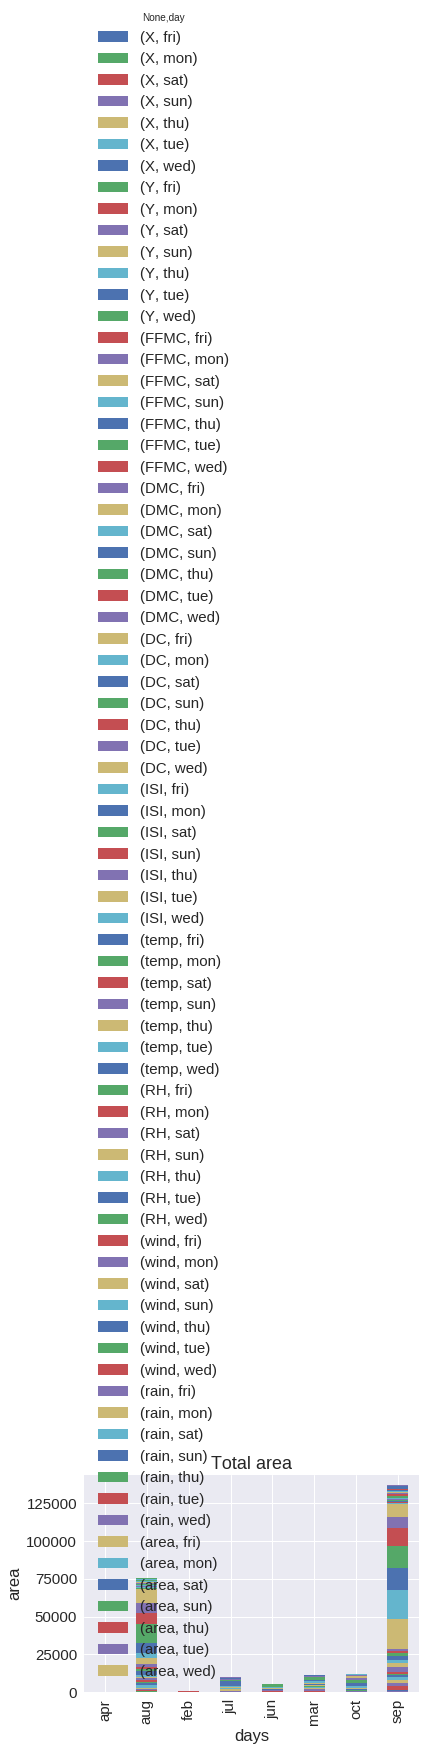

In [30]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total area")
my_plot.set_xlabel("days")
my_plot.set_ylabel("area")